In [ ]:
import jupyter

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df = pd.read_csv("Skyserver2.csv")
df.head()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1237680241455726698,12.272575,-8.260558,19.37720,17.42771,16.41689,16.00279,15.66193,8095,301,2,381,8055928843641575424,GALAXY,0.113784,7155,56629,418
1,1237657589784641643,177.754301,54.167614,16.55477,16.79530,17.28691,17.57460,17.82930,2821,301,2,174,7700129076493965312,STAR,-0.000640,6839,56425,362
2,1237657589785755775,182.048557,54.420262,19.32914,18.42183,18.11385,18.00414,17.94544,2821,301,2,191,7530100323278673920,STAR,-0.000430,6688,56412,297
3,1237665567142314209,210.890519,23.483073,18.21400,17.41439,17.18913,17.01783,16.93317,4678,301,5,64,3134670343378069504,GALAXY,0.028317,2784,54529,600
4,1237665567153062312,236.093503,17.034194,18.18370,16.94342,16.24376,15.83193,15.51619,4678,301,5,228,2835109495103842304,GALAXY,0.048468,2518,54243,340


In [ ]:
frame = df[["u", "g", "r", "i", "z"]]
frame.head()

,u,g,r,i,z
0,19.37720,17.42771,16.41689,16.00279,15.66193
1,16.55477,16.79530,17.28691,17.57460,17.82930
2,19.32914,18.42183,18.11385,18.00414,17.94544
3,18.21400,17.41439,17.18913,17.01783,16.93317
4,18.18370,16.94342,16.24376,15.83193,15.51619


In [ ]:
km = KMeans(n_clusters=5)
y_pred = km.fit_predict(frame[["u", "g", "r", "i", "z"]])
y_pred

array([2, 1, 4, ..., 1, 2, 3], dtype=int32)

In [ ]:
frame['cluster'] = y_pred
frame.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,u,g,r,i,z,cluster
0,19.37720,17.42771,16.41689,16.00279,15.66193,2
1,16.55477,16.79530,17.28691,17.57460,17.82930,1
2,19.32914,18.42183,18.11385,18.00414,17.94544,4
3,18.21400,17.41439,17.18913,17.01783,16.93317,1
4,18.18370,16.94342,16.24376,15.83193,15.51619,3


In [ ]:
frame0 = frame[frame.cluster == 0]
frame1 = frame[frame.cluster == 1]
frame2 = frame[frame.cluster == 2]
frame3 = frame[frame.cluster == 3]
frame4 = frame[frame.cluster == 4]

In [ ]:
k_rng = range(1, 100)
sse = []
for k in k_rng:
  km = KMeans(n_clusters=k)
  km.fit(frame[[ "r", "i", "g", "u", "z"]])
  sse.append(km.inertia_)

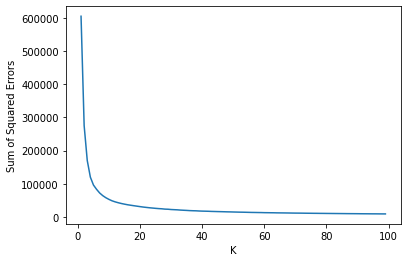

In [ ]:
plt.xlabel("K")
plt.ylabel("Sum of Squared Errors")
plt.plot(k_rng, sse)